In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns







In [2]:
results = pd.read_csv(r'C:\Users\Ahmed Kadiwala\OneDrive\Desktop\PROJECTS\sports-analyst-project\results.csv', encoding='latin1')


In [3]:
pd.options.display.max_columns = None  # Show all columns
pd.options.display.width = 1000  # Adjust width to fit more columns



In [4]:
print("Results Dataset Head:\n", results.head())

Results Dataset Head:
    Unnamed: 0        date home_team away_team  home_score  away_score tournament     city   country  neutral    winner
0           0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow  Scotland    False      Draw
1           1  1873-03-08   England  Scotland           4           2   Friendly   London   England    False   England
2           2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow  Scotland    False  Scotland
3           3  1875-03-06   England  Scotland           2           2   Friendly   London   England    False      Draw
4           4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow  Scotland    False  Scotland


In [6]:
from dateutil import parser
def parse_dates(date_str):
    try:
        # Automatically parse dates and format to day-month-year
        return parser.parse(date_str, dayfirst=True).strftime("%d-%m-%Y")
    except (ValueError, TypeError):
        return None

results['date'] = results['date'].apply(parse_dates)
print(results)

       Unnamed: 0        date home_team     away_team  home_score  away_score          tournament         city   country  neutral    winner
0               0  30-11-1872  Scotland       England           0           0            Friendly      Glasgow  Scotland    False      Draw
1               1  03-08-1873   England      Scotland           4           2            Friendly       London   England    False   England
2               2  03-07-1874  Scotland       England           2           1            Friendly      Glasgow  Scotland    False  Scotland
3               3  03-06-1875   England      Scotland           2           2            Friendly       London   England    False      Draw
4               4  03-04-1876  Scotland       England           3           0            Friendly      Glasgow  Scotland    False  Scotland
...           ...         ...       ...           ...         ...         ...                 ...          ...       ...      ...       ...
47975       47975  3

In [7]:
print("Number of rows and columns in results dataset:", results.shape)

Number of rows and columns in results dataset: (47980, 11)


In [8]:
results['date'] = pd.to_datetime(results['date'], dayfirst=True, errors='coerce')
results['year'] = results['date'].dt.year
print(results)


       Unnamed: 0       date home_team     away_team  home_score  away_score          tournament         city   country  neutral    winner  year
0               0 1872-11-30  Scotland       England           0           0            Friendly      Glasgow  Scotland    False      Draw  1872
1               1 1873-08-03   England      Scotland           4           2            Friendly       London   England    False   England  1873
2               2 1874-07-03  Scotland       England           2           1            Friendly      Glasgow  Scotland    False  Scotland  1874
3               3 1875-06-03   England      Scotland           2           2            Friendly       London   England    False      Draw  1875
4               4 1876-04-03  Scotland       England           3           0            Friendly      Glasgow  Scotland    False  Scotland  1876
...           ...        ...       ...           ...         ...         ...                 ...          ...       ...      ...  

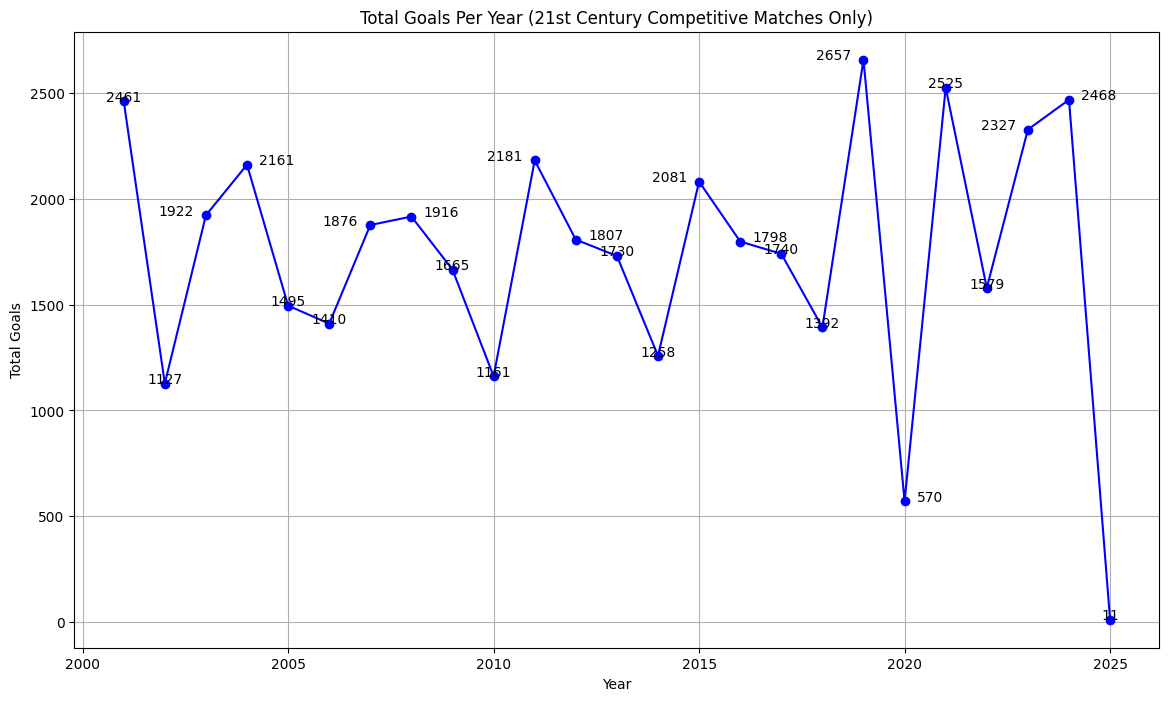

In [14]:
# Exclude friendlies and focus on competitive matches
competitive_matches = results[results['tournament'] != 'Friendly']

# Filter only 21st-century data (year >= 2001)
competitive_21st_century = competitive_matches.loc[competitive_matches['year'] >= 2001].copy()

# Calculate total goals
competitive_21st_century['total_goals'] = (
    competitive_21st_century['home_score'] + competitive_21st_century['away_score']
)

# Group by year and sum total goals
goals_per_year = competitive_21st_century.groupby('year')['total_goals'].sum()

# Visualization
plt.figure(figsize=(14, 8))
plt.plot(goals_per_year.index, goals_per_year.values, marker='o', color='blue')

# Annotate points with flexible positions
for i, (x, y) in enumerate(zip(goals_per_year.index, goals_per_year.values)):
    if i % 4 == 0:
        plt.text(x, y + 1.0, str(y), ha='center', fontsize=10)  # Top
    elif i % 4 == 1:
        plt.text(x, y - 1.0, str(y), ha='center', fontsize=10)  # Bottom
    elif i % 4 == 2:
        plt.text(x - 0.3, y, str(y), ha='right', fontsize=10)  # Left
    else:
        plt.text(x + 0.3, y, str(y), ha='left', fontsize=10)  # Right

plt.title('Total Goals Per Year (21st Century Competitive Matches Only)')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.grid(True)

plt.show()





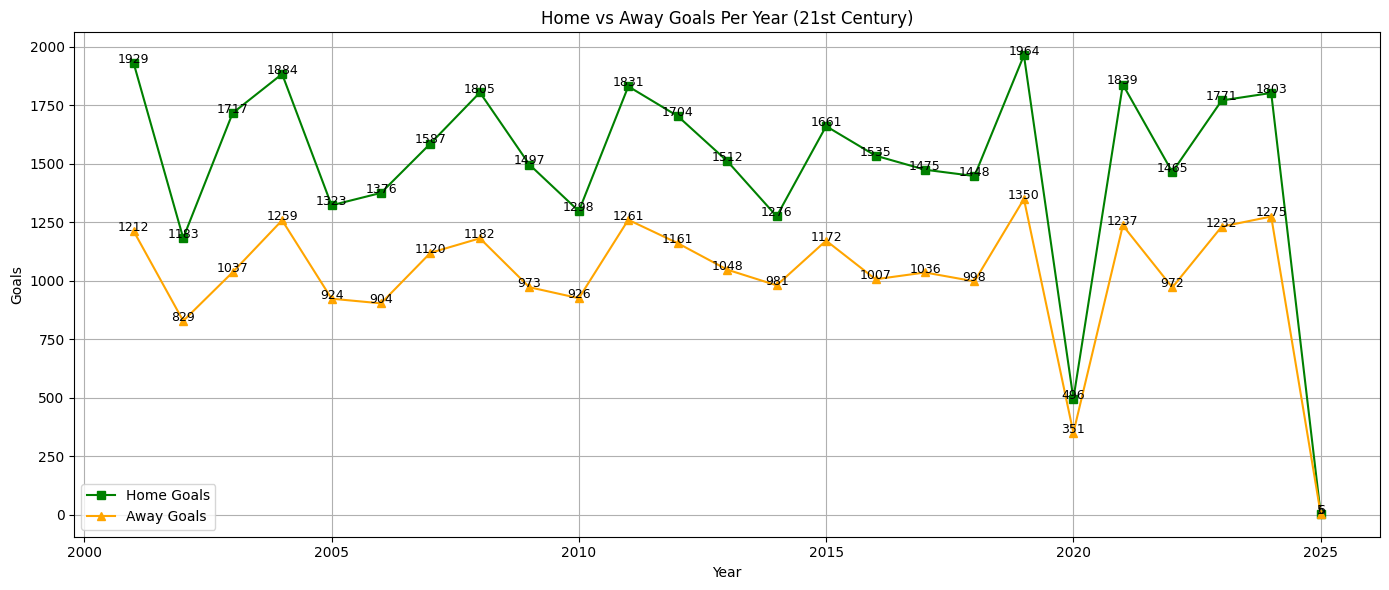

In [23]:
# Filter for 21st-century matches only
results_21st_century = results[results['year'] >= 2001].copy()

# Home vs Away Goals Per Year
home_goals_per_year = results_21st_century.groupby('year')['home_score'].sum()
away_goals_per_year = results_21st_century.groupby('year')['away_score'].sum()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(home_goals_per_year.index, home_goals_per_year.values, marker='s', color='green', label='Home Goals')
plt.plot(away_goals_per_year.index, away_goals_per_year.values, marker='^', color='orange', label='Away Goals')

# Annotate points with small and flexible font sizes
for i, (x, y) in enumerate(zip(home_goals_per_year.index, home_goals_per_year.values)):
    plt.text(x, y + 0.3 if i % 2 == 0 else y - 0.5, str(y), ha='center', fontsize=9, color='black')

for i, (x, y) in enumerate(zip(away_goals_per_year.index, away_goals_per_year.values)):
    plt.text(x, y - 0.3 if i % 2 == 0 else y + 0.5, str(y), ha='center', fontsize=9, color='black')

# Styling and Labels
plt.title('Home vs Away Goals Per Year (21st Century)')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


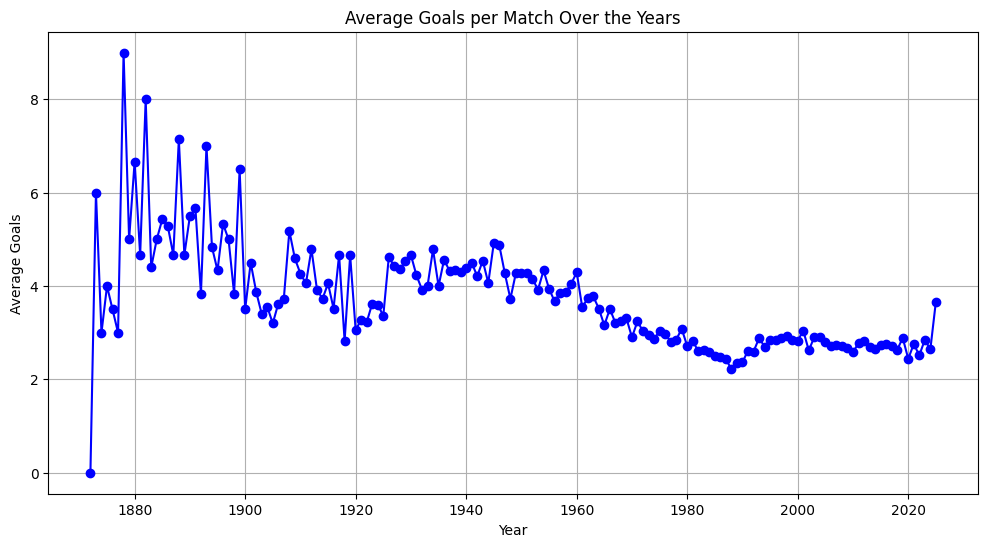

In [25]:
# Group by year and calculate the mean of total goals
average_goals_per_year = results.groupby('year')[['home_score', 'away_score']].mean().sum(axis=1)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(average_goals_per_year.index, average_goals_per_year.values, marker='o', color='blue')
plt.title('Average Goals per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.grid(True)
plt.show()


In [29]:
# Group by year and calculate the mean of total goals
average_goals_per_year = results.groupby('year')[['home_score', 'away_score']].mean().sum(axis=1)
# Sorting the data to find top 20 and bottom 20 years
top_20_years = average_goals_per_year.sort_values(ascending=False).head(20)
bottom_20_years = average_goals_per_year.sort_values(ascending=True).head(20)

# Top 20 years with the most goals
print("Top 20 Years with Most Average Goals per Match:\n", top_20_years)

# Top 20 years with the least goals
print("\nTop 20 Years with Least Average Goals per Match:\n", bottom_20_years)

Top 20 Years with Most Average Goals per Match:
 year
1878    9.000000
1882    8.000000
1888    7.142857
1893    7.000000
1880    6.666667
1899    6.500000
1873    6.000000
1891    5.666667
1890    5.500000
1885    5.428571
1896    5.333333
1886    5.285714
1908    5.178571
1884    5.000000
1879    5.000000
1897    5.000000
1945    4.923077
1946    4.869565
1894    4.833333
1912    4.790698
dtype: float64

Top 20 Years with Least Average Goals per Match:
 year
1872    0.000000
1988    2.218115
1989    2.349920
1990    2.367220
1987    2.432911
2020    2.440922
1986    2.473193
1985    2.492512
2022    2.514964
2010    2.586047
1984    2.588561
1992    2.595000
1982    2.602381
1991    2.618110
2002    2.619792
1983    2.631466
2018    2.632939
2024    2.644330
2014    2.661557
2009    2.670270
dtype: float64


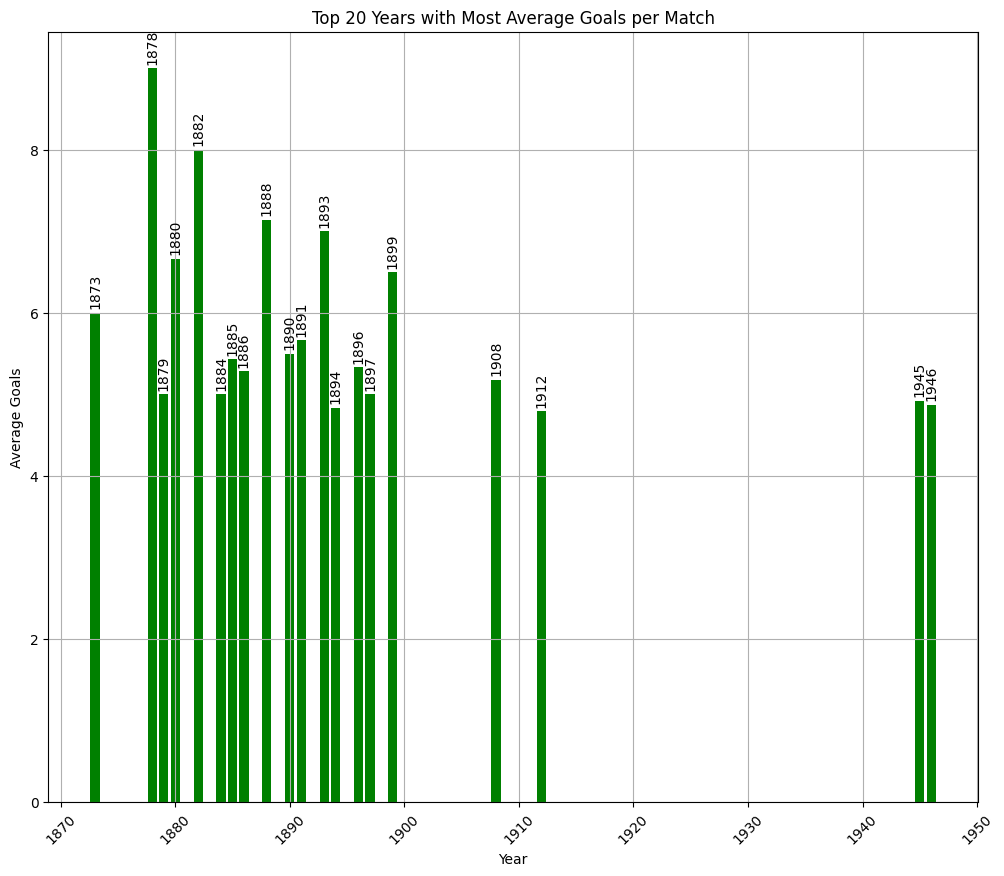

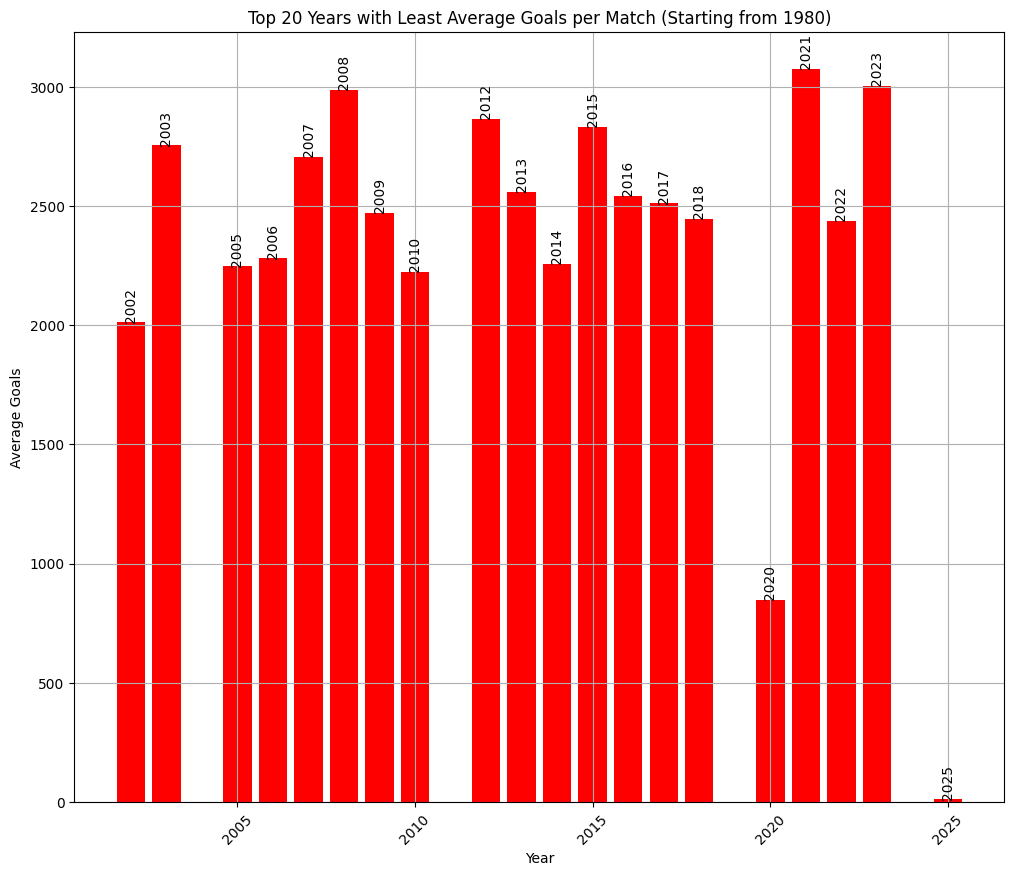

In [30]:
#Filtering goals data to include only years >= 1980 for the bottom 20 years
goals_per_year_filtered = goals_per_year[goals_per_year.index >= 1980]
bottom_20_years = goals_per_year_filtered.sort_values(ascending=True).head(20)

# Plotting top 20 years with the most average goals
plt.figure(figsize=(12, 10))
bars = plt.bar(top_20_years.index, top_20_years.values, color='green')
plt.title('Top 20 Years with Most Average Goals per Match')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)  # Rotate the year labels for better visibility
plt.grid(True)

# Annotating each bar with the corresponding year (vertically at the top)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05,  # Position the label slightly above the bar
             f'{int(bar.get_x() + bar.get_width() / 2)}', ha='center', va='bottom', fontsize=10, rotation=90)

plt.show()

# Plotting bottom 20 years with the least average goals (starting from 1980)
plt.figure(figsize=(12, 10))
bars = plt.bar(bottom_20_years.index, bottom_20_years.values, color='red')
plt.title('Top 20 Years with Least Average Goals per Match (Starting from 1980)')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)  # Rotate the year labels for better visibility
plt.grid(True)

# Annotating each bar with the corresponding year (vertically at the top)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05,  # Position the label slightly above the bar
             f'{int(bar.get_x() + bar.get_width() / 2)}', ha='center', va='bottom', fontsize=10, rotation=90)

plt.show()



In [31]:
#%% Basic Data Inspection
print("Initial Data Shape:", results.shape)
print("\nFirst 5 Rows:")
display(results.head())
print("\nData Types:")
print(results.dtypes)
print("\nMissing Values:")
print(results.isnull().sum())


Initial Data Shape: (47980, 13)

First 5 Rows:


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,total_goals
0,0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,1872,0
1,1,1873-08-03,England,Scotland,4,2,Friendly,London,England,False,England,1873,6
2,2,1874-07-03,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,3
3,3,1875-06-03,England,Scotland,2,2,Friendly,London,England,False,Draw,1875,4
4,4,1876-04-03,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,3



Data Types:
Unnamed: 0              int64
date           datetime64[ns]
home_team              object
away_team              object
home_score              int64
away_score              int64
tournament             object
city                   object
country                object
neutral                  bool
winner                 object
year                    int32
total_goals             int64
dtype: object

Missing Values:
Unnamed: 0     0
date           0
home_team      0
away_team      0
home_score     0
away_score     0
tournament     0
city           0
country        0
neutral        0
winner         0
year           0
total_goals    0
dtype: int64


In [32]:
#%% Data Cleaning

# Remove incomplete rows (if any)
results = results.dropna()  # Drop rows with missing values

# Convert date to datetime
results['date'] = pd.to_datetime(results['date'])

# Convert neutral to boolean
results['neutral'] = results['neutral'].map({'TRUE': True, 'FALSE': False})

# Standardize country names
country_mapping = {
    'Irish Free State': 'Ireland',
    'Mandatory Palestine': 'Israel',
    'Bohemia': 'Czech Republic',
    'Dutch Guyana': 'Suriname'
}
results['country'] = results['country'].replace(country_mapping)

# Ensure scores are numeric
results['home_score'] = pd.to_numeric(results['home_score'], errors='coerce')
results['away_score'] = pd.to_numeric(results['away_score'], errors='coerce')

# Drop rows with invalid scores (if any)
results = results.dropna(subset=['home_score', 'away_score'])

print(results.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47980 entries, 0 to 47979
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   47980 non-null  int64         
 1   date         47980 non-null  datetime64[ns]
 2   home_team    47980 non-null  object        
 3   away_team    47980 non-null  object        
 4   home_score   47980 non-null  int64         
 5   away_score   47980 non-null  int64         
 6   tournament   47980 non-null  object        
 7   city         47980 non-null  object        
 8   country      47980 non-null  object        
 9   neutral      0 non-null      object        
 10  winner       47980 non-null  object        
 11  year         47980 non-null  int32         
 12  total_goals  47980 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(4), object(7)
memory usage: 4.6+ MB
None



Score Statistics:
         home_score    away_score
count  47980.000000  47980.000000
mean       1.758691      1.182388
std        1.773369      1.400001
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000


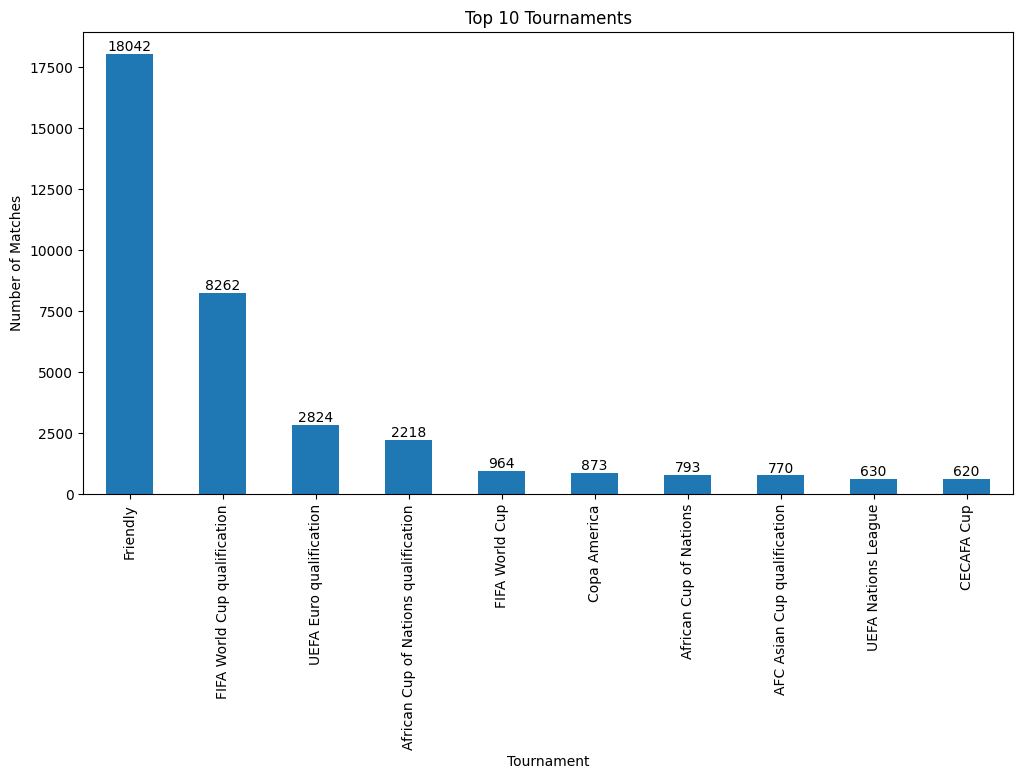

In [33]:
#%% Exploratory Data Analysis (EDA)
# Basic statistics
print("\nScore Statistics:")
print(results[['home_score', 'away_score']].describe())

# Tournament analysis
plt.figure(figsize=(12,6))
tournament_counts = results['tournament'].value_counts().head(10)

# Check if tournament_counts is empty
if not tournament_counts.empty:
    tournament_counts.plot(kind='bar')
    plt.title('Top 10 Tournaments')
    plt.xlabel('Tournament')
    plt.ylabel('Number of Matches')

    # Annotate bar heights
    for i, v in enumerate(tournament_counts):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

    plt.show()
else:
    print("No data available for tournament analysis.")





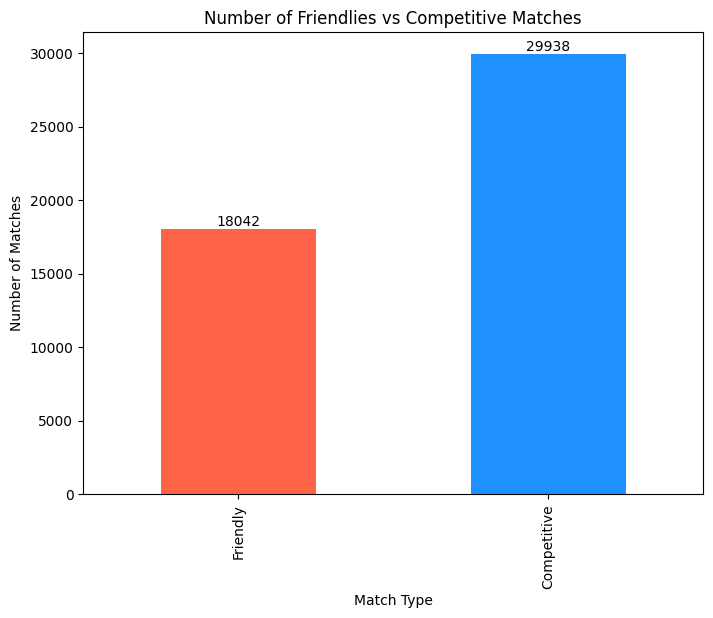

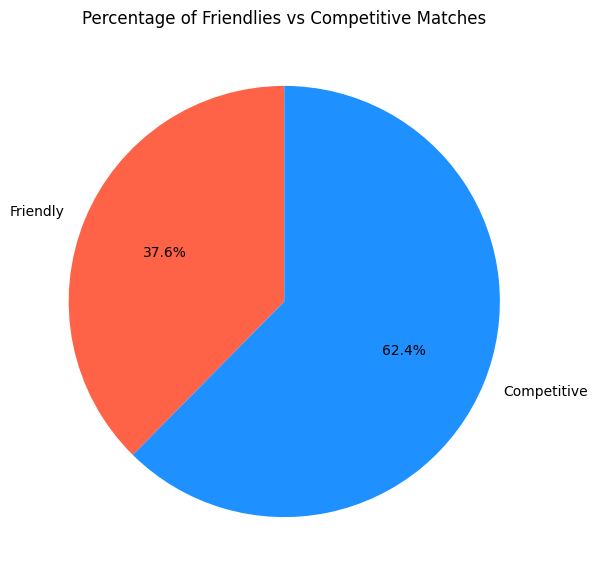

In [34]:
# Segregate friendlies and competitive matches
friendlies = results[results['tournament'] == 'Friendly']
competitive = results[results['tournament'] != 'Friendly']

# Count the number of friendlies and competitive matches
match_counts = pd.Series([len(friendlies), len(competitive)], index=['Friendly', 'Competitive'])

# Plot the counts as a bar chart
plt.figure(figsize=(8,6))
match_counts.plot(kind='bar', color=['#FF6347', '#1E90FF'])
plt.title('Number of Friendlies vs Competitive Matches')
plt.xlabel('Match Type')
plt.ylabel('Number of Matches')

# Annotate bar heights
for i, v in enumerate(match_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

# Plot a percentage pie chart
plt.figure(figsize=(7,7))
match_counts_percentage = match_counts / match_counts.sum() * 100  # Convert to percentage
match_counts_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['#FF6347', '#1E90FF'], startangle=90, legend=False)
plt.title('Percentage of Friendlies vs Competitive Matches')
plt.ylabel('')  # Remove the ylabel for a cleaner look

plt.show()

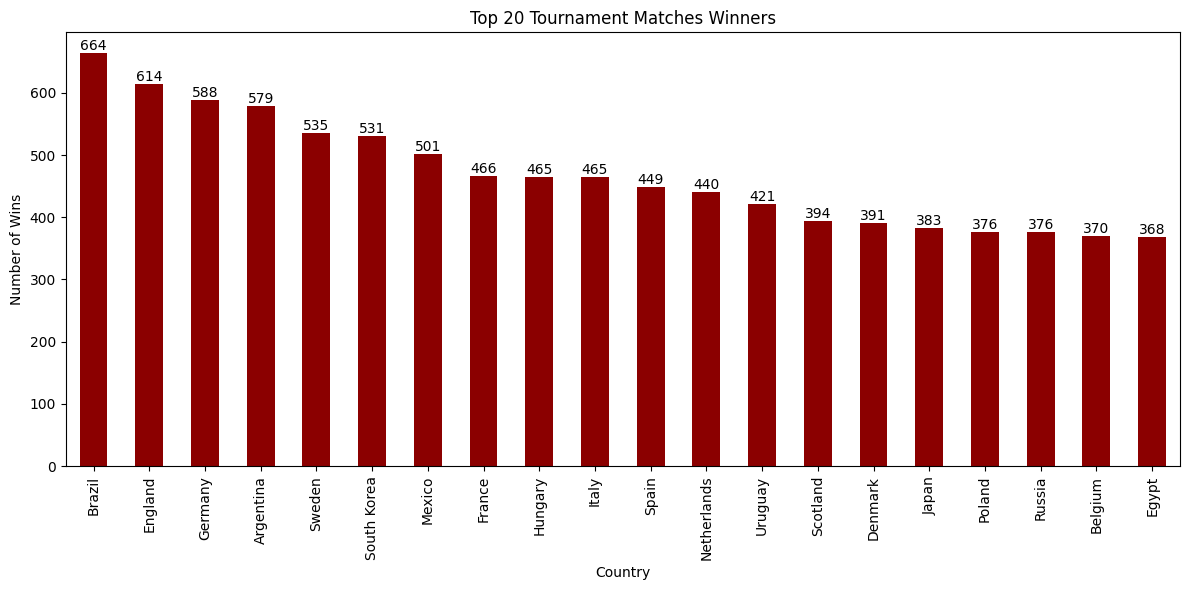

In [35]:
# Helper function to plot bar graphs with values on top
def plot_top_20(data, title, xlabel, ylabel, color):
    plt.figure(figsize=(12, 6))
    ax = data.head(20).plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom')
    plt.tight_layout()  # Adjusts layout to make sure everything fits
    plt.show()

# Function to update dataset with top 20 winners for each tournament
def update_with_top_20_winners(tournament_name, color):
    # Filter the dataset based on the tournament
    matches = results[results['tournament'] == tournament_name]
    wins = matches[matches['winner'] != 'Draw']['winner'].value_counts()

    # Show the top 20 countries with the most wins in this tournament
    print(f"Top 20 Countries with Most Wins in {tournament_name}:\n", wins.head(20))
    plot_top_20(wins, f'Top 20 Countries with Most Wins in {tournament_name}', 'Country', 'Number of Wins', color)

    # Update the original dataframe with the top 20 countries
    top_20_countries = wins.head(20).index.tolist()
    results[tournament_name + '_Top_20'] = results['winner'].apply(lambda x: x if x in top_20_countries else 'Others')

# Function to show the tournament winners (most frequent winner across all tournaments)
def plot_tournament_winners():
    tournament_winners = results[results['winner'] != 'Draw']['winner'].value_counts()
    plot_top_20(tournament_winners, 'Top 20 Tournament Matches Winners', 'Country', 'Number of Wins', 'darkred')

# Plot the overall tournament winners (most frequent winners across all tournaments)
plot_tournament_winners()




In [36]:
import matplotlib.pyplot as plt

# Define the top 20 winning nations for each tournament based on historical data
# These values are based on official sources and historical records.

# FIFA World Cup (top winners by number of victories)
world_cup_winners = {
    'Brazil': 5,
    'Germany': 4,
    'Italy': 4,
    'Argentina': 3,
    'Uruguay': 2,
    'France': 2,
    'England': 1,
    'Spain': 1
}

# UEFA European Championship (top winners by number of victories)
euro_winners = {
    'Germany': 3,
    'Spain': 3,
    'France': 2,
    'Italy': 2,
    'Russia': 1,
    'Netherlands': 1,
    'Czechoslovakia': 1,
    'Denmark': 1,
    'Greece': 1
}

# Copa America (top winners by number of victories)
copa_america_winners = {
    'Uruguay': 15,
    'Argentina': 15,
    'Brazil': 9,
    'Chile': 2,
    'Paraguay': 2,
    'Peru': 2,
    'Colombia': 1
}

# African Cup of Nations (top winners by number of victories)
african_cup_winners = {
    'Egypt': 7,
    'Cameroon': 5,
    'Nigeria': 3,
    'Ghana': 4,
    'Côte d\'Ivoire': 2,
    'Algeria': 2,
    'Zambia': 1,
    'Tunisia': 1
}

# UEFA Nations League (top winners by number of victories)
nations_league_winners = {
    'Portugal': 1,
    'France': 1
}

# AFC Asian Cup (top winners by number of victories)
asian_cup_winners = {
    'Japan': 4,
    'Saudi Arabia': 3,
    'Iran': 3,
    'South Korea': 2,
    'Iraq': 1,
    'Kuwait': 1,
    'Australia': 1
}

# Function to plot the winners for a given tournament
def plot_tournament_winners(winner_dict, title, color):
    plt.figure(figsize=(12, 8))
    winners = list(winner_dict.keys())
    wins = list(winner_dict.values())
    
    plt.bar(winners, wins, color=color)
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel('Number of Wins')

    # Annotating bar heights
    for i, v in enumerate(wins):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Ensure everything fits nicely
    plt.show()

# Separate functions for each tournament:

def plot_world_cup():
    print("FIFA World Cup")
    plot_tournament_winners(world_cup_winners, 'World Cup Winners', 'blue')

def plot_euro():
    print("UEFA European Championship")
    plot_tournament_winners(euro_winners, 'UEFA Euro Winners', 'purple')

def plot_copa_america():
    print("Copa America")
    plot_tournament_winners(copa_america_winners, 'Copa America Winners', 'green')

def plot_african_cup():
    print("African Cup of Nations")
    plot_tournament_winners(african_cup_winners, 'African Cup of Nations Winners', 'orange')

def plot_nations_league():
    print("UEFA Nations League")
    plot_tournament_winners(nations_league_winners, 'UEFA Nations League Winners', 'red')

def plot_asian_cup():
    print("AFC Asian Cup")
    plot_tournament_winners(asian_cup_winners, 'AFC Asian Cup Winners', 'cyan')


In [37]:
# Load the dataset
file_path = 'results.csv'  # Make sure to update if needed
df = pd.read_csv(r'C:\Users\Ahmed Kadiwala\OneDrive\Desktop\PROJECTS\sports-analyst-project\results.csv',encoding='ISO-8859-1')

# Function to segregate each tournament for top 20 countries with the most matches won
def plot_top_20_matches_won(tournament_name, color):
    # Filter data for the given tournament
    tournament_data = df[df['tournament'] == tournament_name]
    
    # Check if there is any data for the tournament
    if tournament_data.empty:
        print(f"No data found for {tournament_name}")
        return
    
    # Filter out the matches that have a winner and exclude draws
    tournament_wins = tournament_data[tournament_data['winner'] != 'Draw']
    
    # Get the top 20 countries with the most matches won in this tournament
    top_20_matches_won = tournament_wins['winner'].value_counts().head(20)
    
    # Check if we have enough data to plot
    if top_20_matches_won.empty:
        print(f"No matches won data available for {tournament_name}")
        return
    
    # Plotting the bar graph
    plt.figure(figsize=(12, 6))
    top_20_matches_won.plot(kind='bar', color=color)
    plt.title(f'Most Matches Won in {tournament_name}')
    plt.xlabel('Country')
    plt.ylabel('Number of Matches Won')
    
    # Annotating bar heights
    for i, v in enumerate(top_20_matches_won):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()




FIFA World Cup


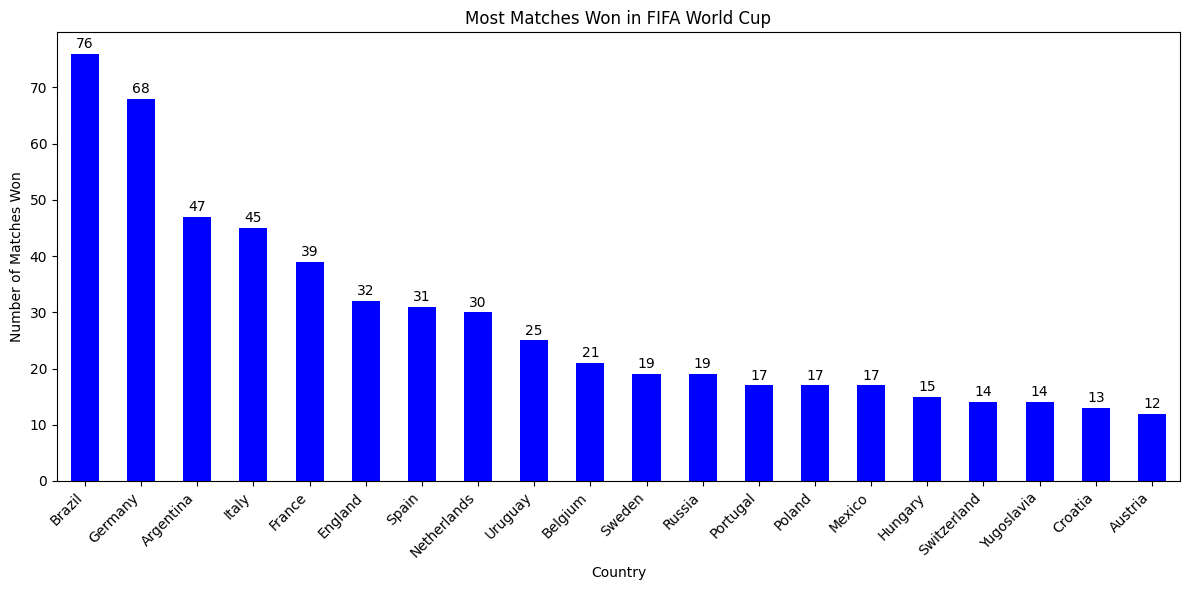

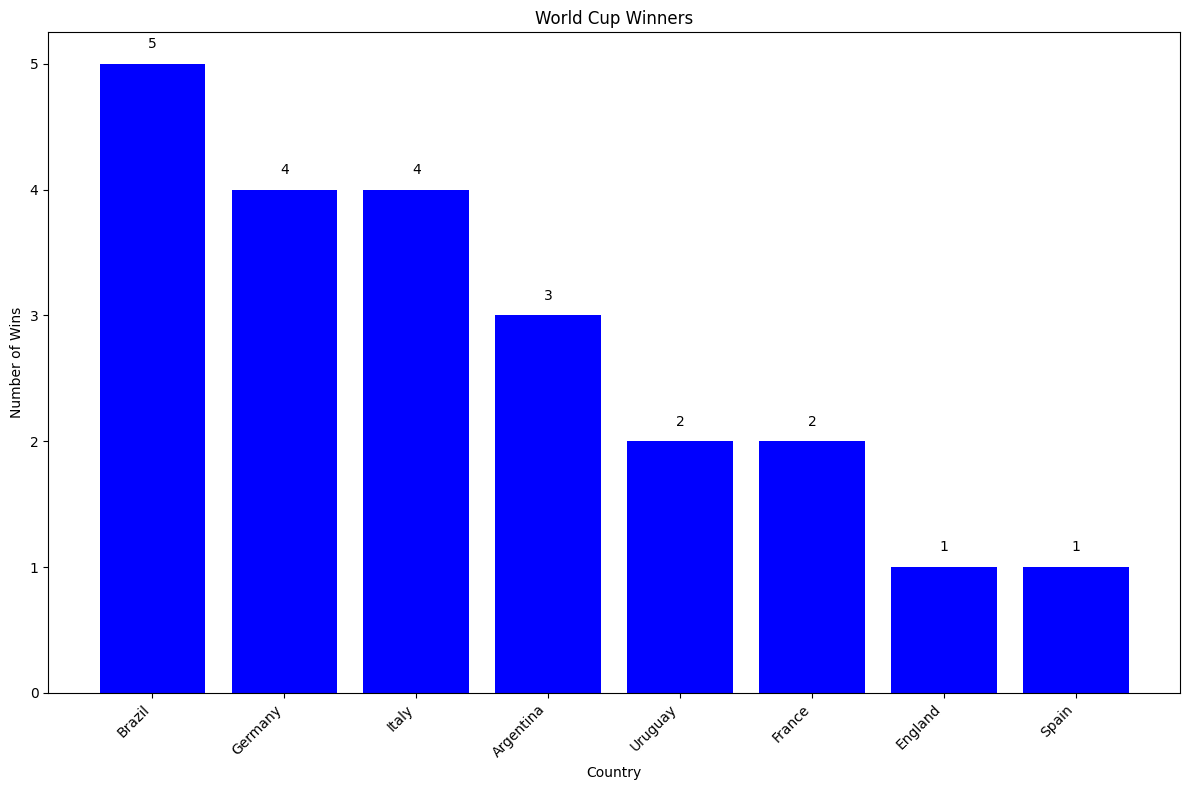

In [38]:
# FIFA World Cup
plot_top_20_matches_won('FIFA World Cup', 'blue')
plot_world_cup()


UEFA European Championship


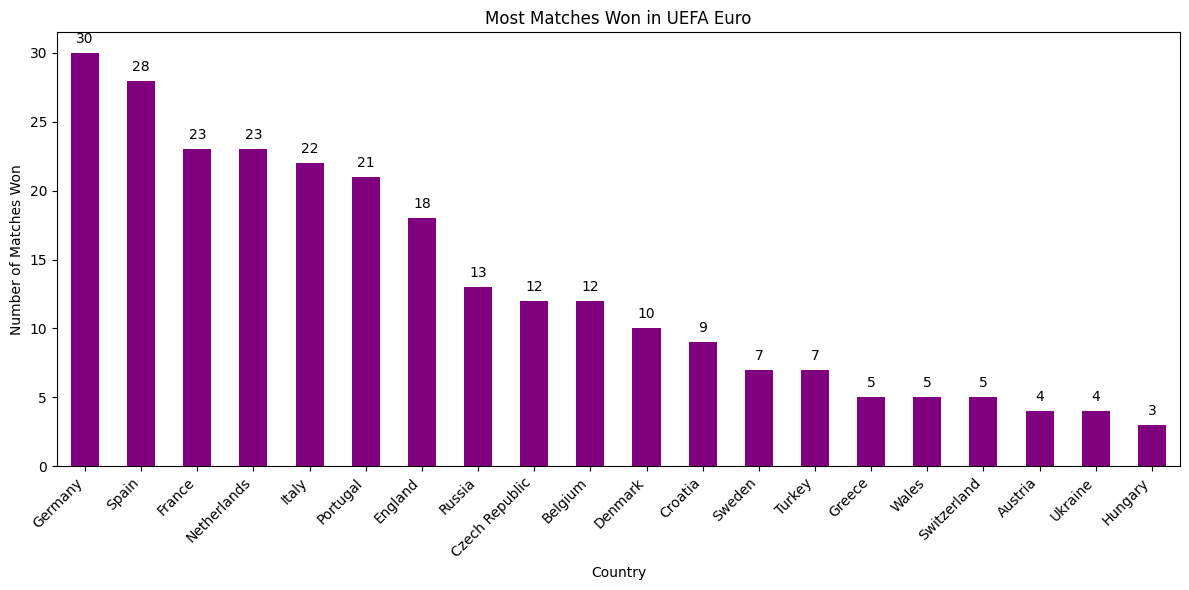

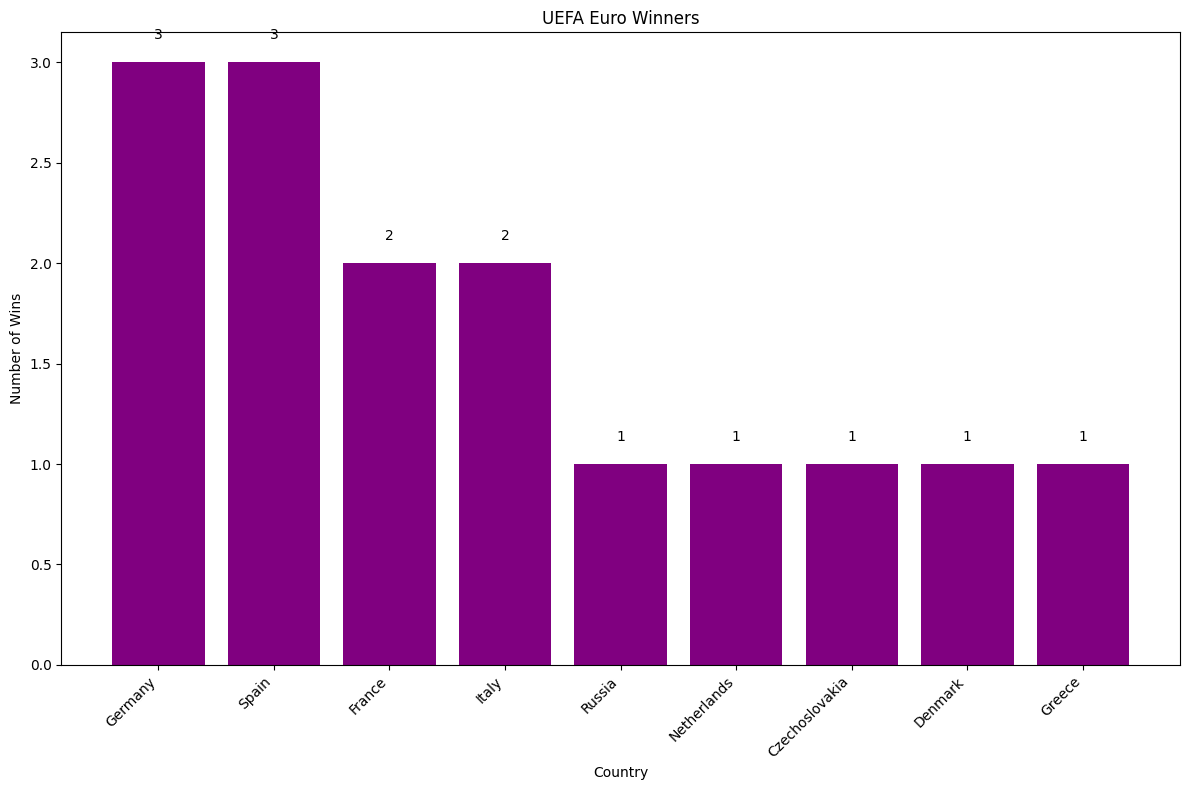

In [39]:
# UEFA European Championship
plot_top_20_matches_won('UEFA Euro', 'purple')
plot_euro()



Copa America


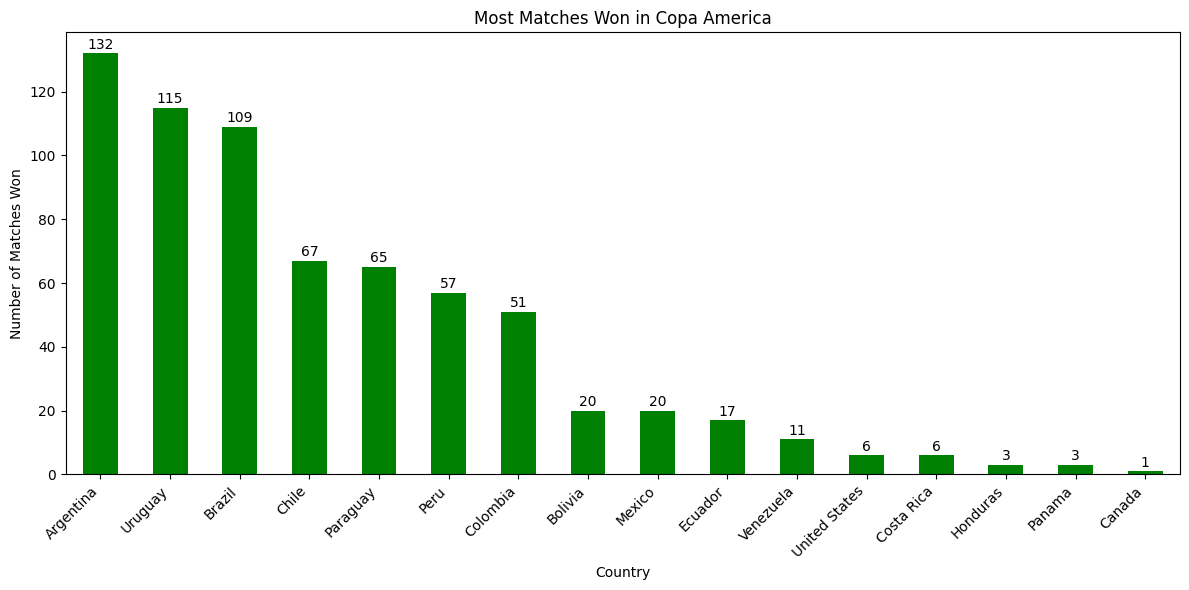

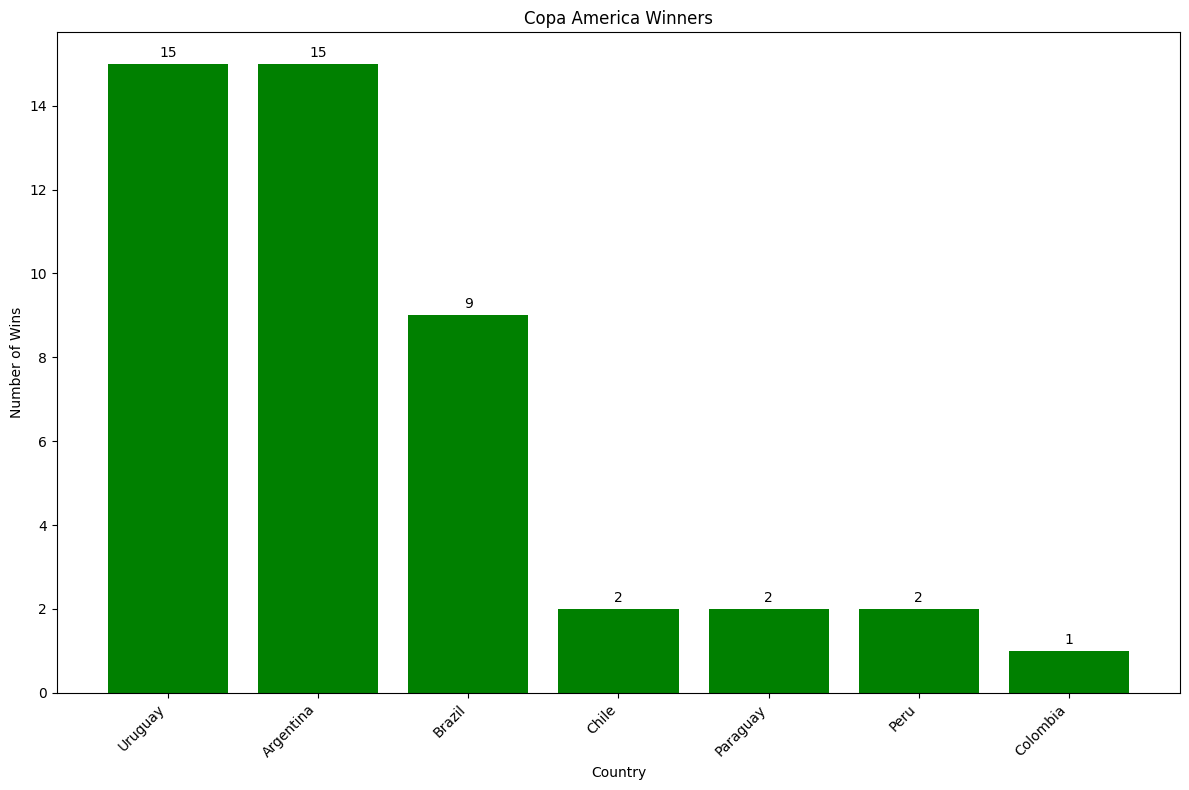

African Cup of Nations


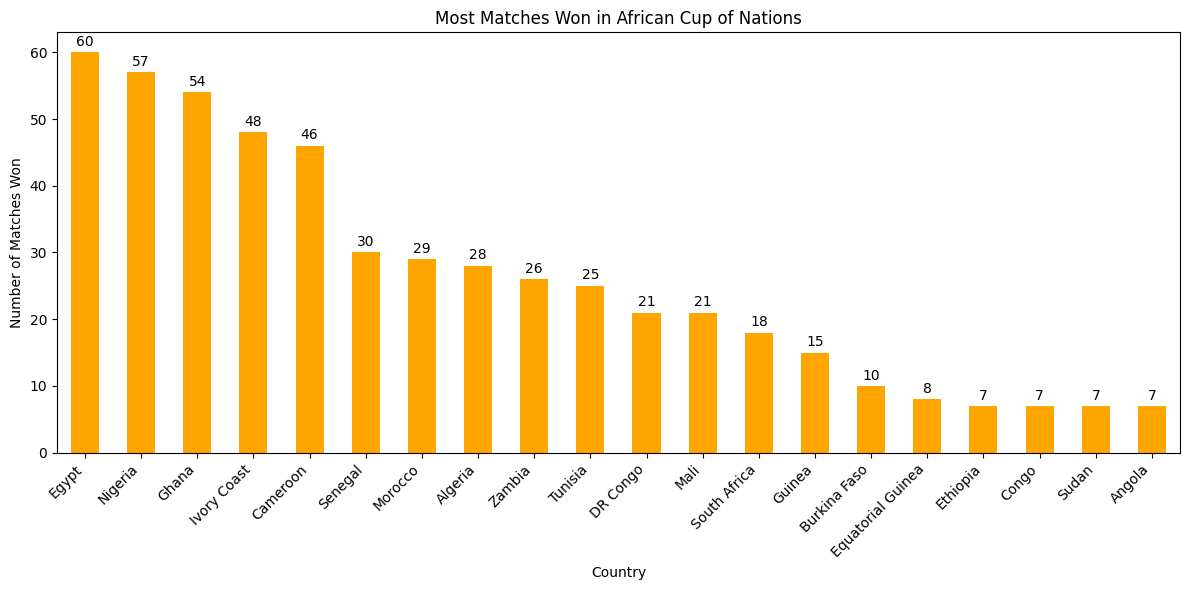

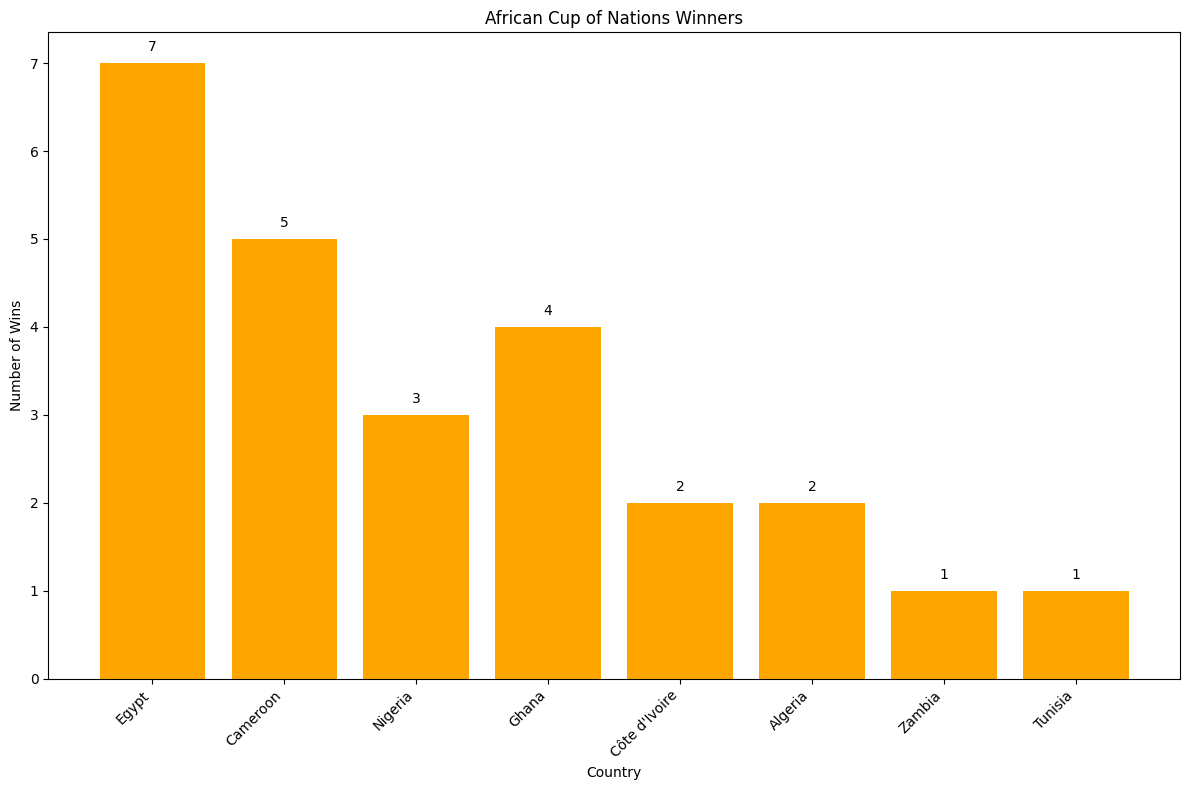

UEFA Nations League


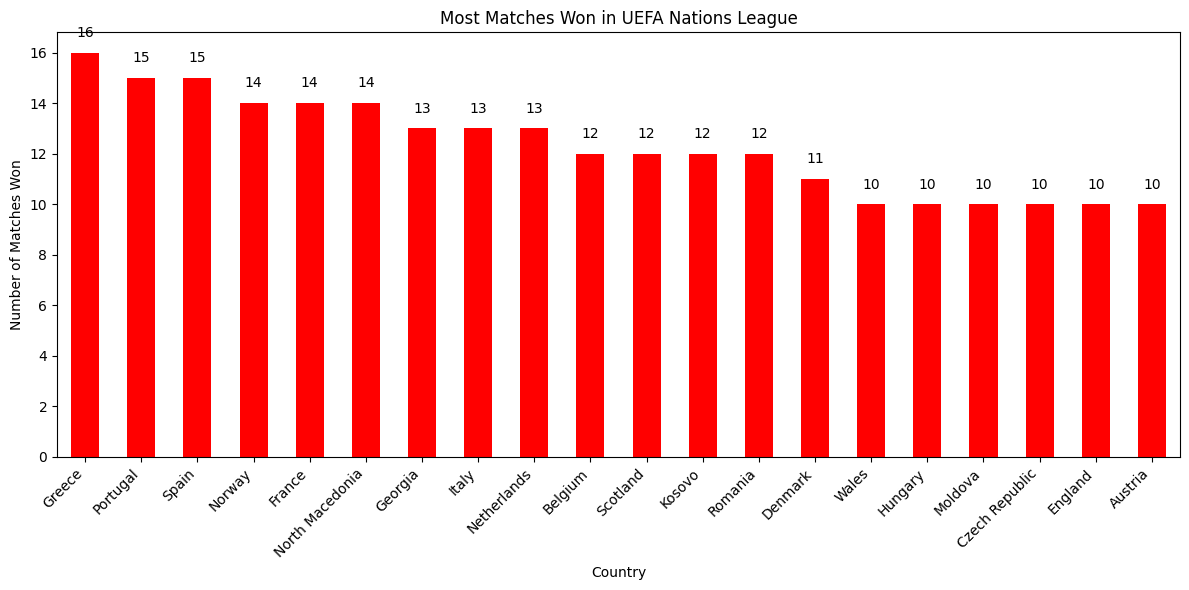

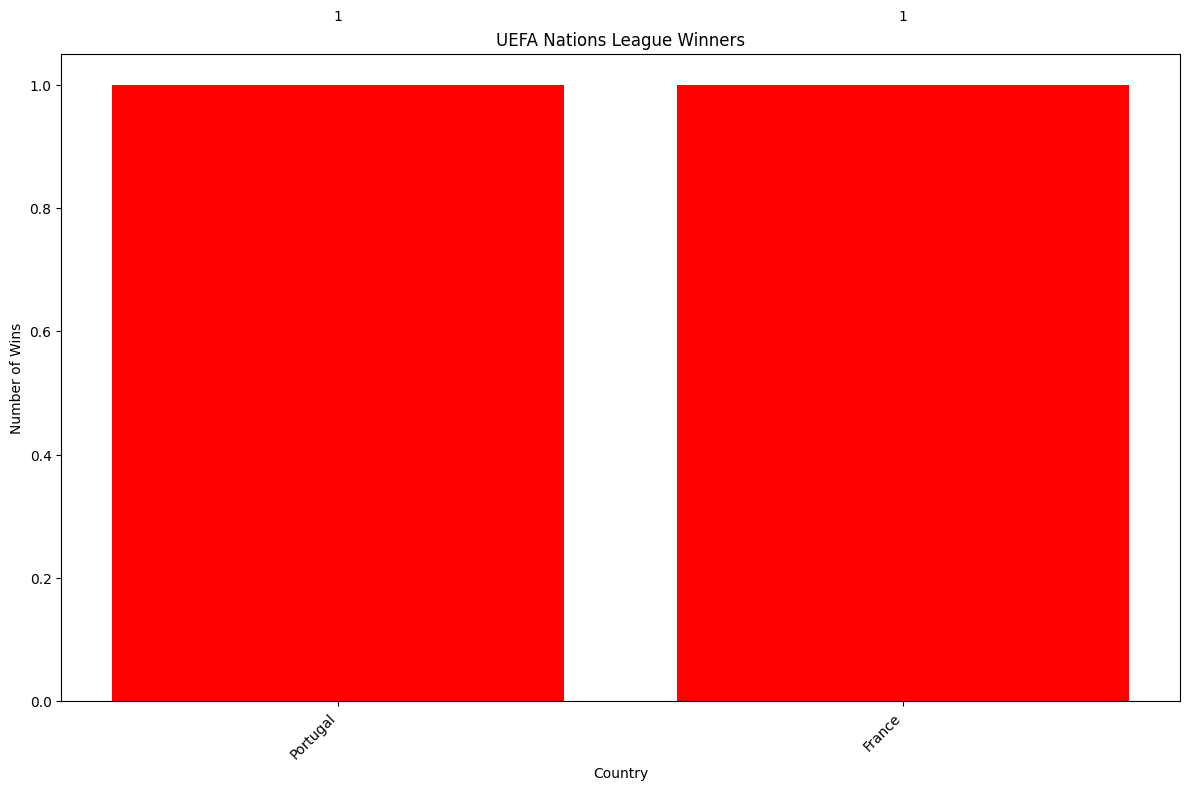

AFC Asian Cup


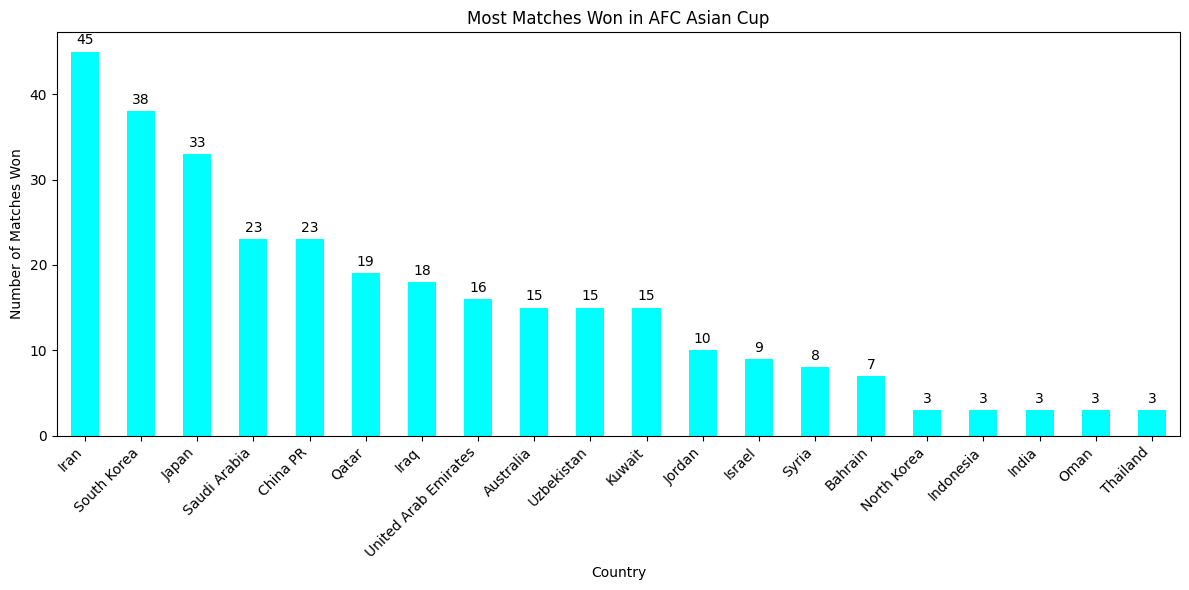

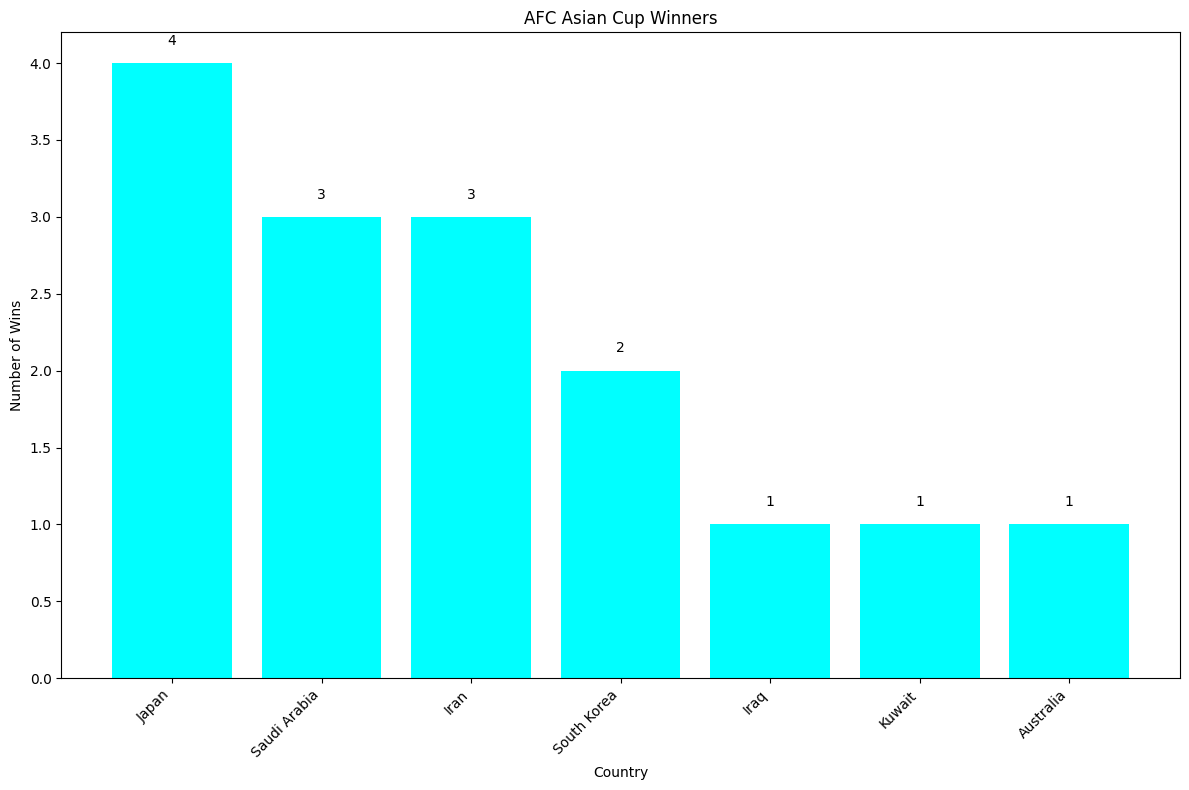

In [40]:
# Copa America
plot_top_20_matches_won('Copa America', 'green')
plot_copa_america() 

# African Cup of Nations
plot_top_20_matches_won('African Cup of Nations', 'orange')
plot_african_cup()

# UEFA Nations League
plot_top_20_matches_won('UEFA Nations League', 'red')
plot_nations_league()

# AFC Asian Cup
plot_top_20_matches_won('AFC Asian Cup', 'cyan')
plot_asian_cup()